# Day 4: Feature Engineering + Logistic Regression

In [1]:
import pandas as pd

df = pd.read_csv('C:/Users/rohit/depression-risk-predictor/data/processed/cleaned_survey_data.csv')
df.head()


,age,gender,occupation,sleep_hours,social_media_minutes,activity_level,emotional_score,mental_health_history,post_text,risk,sentiment_score
0,33,Male,Engineer,4.7,82,9935,1,0,I can't do this anymore.,1,0.0000
1,18,Male,Student,6.3,43,4257,10,0,Everything feels heavy.,1,-0.2000
2,25,Male,Freelancer,7.3,204,5552,2,1,I'm full of energy!,0,0.4375
3,21,Male,Student,5.5,206,5333,0,0,Feeling a bit anxious.,0,-0.2500
4,27,Other,Writer,5.1,351,6925,9,1,I can't do this anymore.,1,0.0000


In [2]:
# One-hot encode gender and occupation
df_encoded = pd.get_dummies(df, columns=['gender', 'occupation'], drop_first=True)
df_encoded.head()


,age,sleep_hours,social_media_minutes,activity_level,emotional_score,mental_health_history,post_text,risk,sentiment_score,gender_Male,gender_Other,occupation_Chef,occupation_Doctor,occupation_Engineer,occupation_Freelancer,occupation_Intern,occupation_Manager,occupation_Student,occupation_Teacher,occupation_Writer
0,33,4.7,82,9935,1,0,I can't do this anymore.,1,0.0000,True,False,False,False,True,False,False,False,False,False,False
1,18,6.3,43,4257,10,0,Everything feels heavy.,1,-0.2000,True,False,False,False,False,False,False,False,True,False,False
2,25,7.3,204,5552,2,1,I'm full of energy!,0,0.4375,True,False,False,False,False,True,False,False,False,False,False
3,21,5.5,206,5333,0,0,Feeling a bit anxious.,0,-0.2500,True,False,False,False,False,False,False,False,True,False,False
4,27,5.1,351,6925,9,1,I can't do this anymore.,1,0.0000,False,True,False,False,False,False,False,False,False,False,True


In [4]:
!pip install scikit-learn


  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl (10.7 MB)
Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl (38.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -------------------------- 1/3 [scipy]
   ------------- -----------------

In [5]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['risk', 'post_text'], axis=1)
y = df_encoded['risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\rohit\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8095238095238095
Confusion Matrix:
 [[ 5  0]
 [ 4 12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.75      0.86        16

    accuracy                           0.81        21
   macro avg       0.78      0.88      0.79        21
weighted avg       0.89      0.81      0.82        21



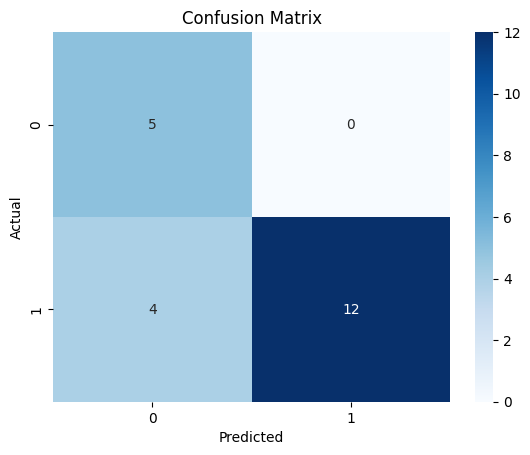

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [9]:
import joblib
import os

os.makedirs('C:/Users/rohit/depression-risk-predictor/models', exist_ok=True)
joblib.dump(model, 'C:/Users/rohit/depression-risk-predictor/models/logistic_model.pkl')


['C:/Users/rohit/depression-risk-predictor/models/logistic_model.pkl']